In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
titan = pd.read_csv('/Users/Natasha/Downloads/titan_dl_jobs_labelled.csv')
df = pd.DataFrame(titan, columns= ['user_id','proj_area','node_count','command'])
print(df)

      user_id         proj_area  node_count  \
0     User761  Computer Science        32.0   
1     User761  Computer Science        32.0   
2     User761  Computer Science        32.0   
3     User761  Computer Science        32.0   
4     User761  Computer Science        16.0   
...       ...               ...         ...   
7019  User761  Computer Science        32.0   
7020  User761  Computer Science        32.0   
7021  User761  Computer Science        32.0   
7022  User761  Computer Science        16.0   
7023  User761  Computer Science        16.0   

                                    command  
0     /lustre/atlas/User761/Area15-36/caffe  
1     /lustre/atlas/User761/Area15-36/caffe  
2     /lustre/atlas/User761/Area15-36/caffe  
3     /lustre/atlas/User761/Area15-36/caffe  
4     /lustre/atlas/User761/Area15-36/caffe  
...                                     ...  
7019  /lustre/atlas/User761/Area15-36/caffe  
7020  /lustre/atlas/User761/Area15-36/caffe  
7021  /lustre/atlas/U

No. of Unique Users:  19
{'<=16': 2222, '16-32': 931, '32-64': 3378, '64-500': 369, '500-15000': 111, '>15000': 13}


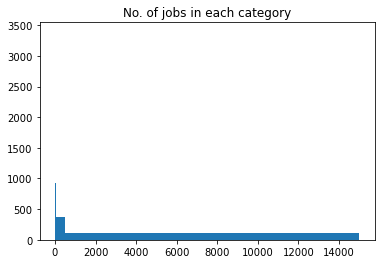

In [2]:
users=[]
projects=[]
nodes=[]
commands=[]
nodes_hm={"<10":0,"10-100":0,"100-500":0,"500-1000":0,">1000":0}
nodes_hm2={"<=16":0,"16-32":0,"32-64":0,"64-500":0,"500-15000":0,">15000":0}
for user in df['user_id']:
    users.append(user)
for proj in df['proj_area']:
    projects.append(proj)
for comm in df['command']:
    commands.append(comm)
        
for node in df['node_count']:
    nodes.append(node)
    if node<16:
        nodes_hm2["<=16"]+=1
    elif node in range(16,32):
        nodes_hm2["16-32"]+=1
    elif node in range(32,64):
        nodes_hm2["32-64"]+=1
    elif node in range(64,500):
        nodes_hm2["64-500"]+=1
    elif node in range(500,15000):
        nodes_hm2["500-15000"]+=1
    else:
        nodes_hm2[">15000"]+=1

print("No. of Unique Users: ",len(set(users)))
 
# # Show plot
# plt.show()
print(nodes_hm2)
plt.hist(nodes, bins=[0,16,32,64,500,15000])
plt.title("No. of jobs in each category")
plt.show()

count_hm={}
project_hm={}
for i in range(len(users)):
    if users[i] in count_hm:
        count_hm[users[i]]+=1
    else:
        count_hm[users[i]]=1
print("Unique Users: ",len(count_hm))
for i in range(len(projects)):
    if projects[i] in project_hm:
        project_hm[projects[i]]+=1
    else:
        project_hm[projects[i]]=1
print(project_hm)

For Category 1:  {'User1704', 'User896', 'User1377', 'User1282', 'User1679', 'User161', 'User1208', 'User1337', 'User1135', 'User1685', 'User272', 'User761', 'User424', 'User1028', 'User1172', 'User1229', 'User281', 'User889', 'User1568'} {nan, 'High Energy Physics', 'Computer Science'}

For Category 2:  {'User1229', 'User761', 'User1704', 'User161', 'User1028', 'User1377', 'User1282'} {nan, 'Computer Science'}

For Category 3:  {'User1229', 'User761', 'User1704', 'User161', 'User1377', 'User1282'} {nan, 'Computer Science'}

For Category 4:  {'User1229', 'User761', 'User281', 'User1704', 'User161', 'User1028', 'User1377', 'User1282'} {nan, 'Computer Science'}

For Category 5:  {'User761', 'User281', 'User1704', 'User1028', 'User1377', 'User1282'} {nan, 'High Energy Physics', 'Computer Science'}

For Category 6:  {'User1028'} {'Computer Science'}


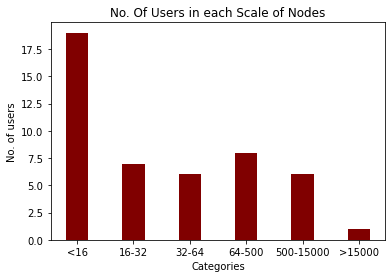


For Category 1:  {'./caffe', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file+pat', '/lustre/atlas/User1028/Area15-177/MENNDL', '/lustre/atlas/User1028/Area15-209/MENNDL_MasterSlave_bestfit', './train_lenet.sh', './cifar10_lenet_train_full_mos.sh', './dist-train-imagenet-gossip_x32_test', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_copies4', '/lustre/atlas/User896/Area15-177/MENNDL', '/lustre/atlas/User1704/Area15-242/caffe', './dist-train-imagenet-gossip_x128_test', './train_lenet_128.sh', './cifar10_alexnet_train_full_mos.sh', './caffe.bin', '/lustre/atlas/User1028/Area15-177/MENNDL_MasterSlave_bestfit', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_bestfit', './new-dist-train-imagenet-titan_sync_x4_test', '/lustre/atlas/User1028/Area24-285/MENNDL', '/lustre/atlas/User1685/Area15-177/MENNDL_MasterSlave_bestfit', 'Area15-177/caffe.bin', './lenet', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave', './train_caffenet.sh', 'Area15-177/caffe', '/lu

In [3]:
cat1_user=set()
cat1_commands=set()
cat1_project_area=set()
cat2_user=set()
cat2_commands=set()
cat2_project_area=set()
cat3_user=set()
cat3_commands=set()
cat3_project_area=set()
cat4_user=set()
cat4_commands=set()
cat4_project_area=set()
cat5_user=set()
cat5_commands=set()
cat5_project_area=set()
cat6_user=set()
cat6_commands=set()
cat6_project_area=set()

for i in range(len(users)):
    if nodes[i] in range(16):
        cat1_user.add(users[i])
        cat1_commands.add(commands[i])
        cat1_project_area.add(projects[i])
    elif nodes[i] in range(16,32):
        cat2_user.add(users[i])
        cat2_commands.add(commands[i])
        cat2_project_area.add(projects[i])
    elif nodes[i] in range(32,64):
        cat3_user.add(users[i])
        cat3_commands.add(commands[i])
        cat3_project_area.add(projects[i])
    elif nodes[i] in range(64,500):
        cat4_user.add(users[i])
        cat4_commands.add(commands[i])
        cat4_project_area.add(projects[i])
    elif nodes[i] in range(500,15000):
        cat5_user.add(users[i])
        cat5_commands.add(commands[i])
        cat5_project_area.add(projects[i])
    else:
        cat6_user.add(users[i])
        cat6_commands.add(commands[i])
        cat6_project_area.add(projects[i])
print("For Category 1: ",cat1_user,cat1_project_area)
print("\nFor Category 2: ",cat2_user,cat2_project_area)
print("\nFor Category 3: ",cat3_user,cat3_project_area)
print("\nFor Category 4: ",cat4_user,cat4_project_area)
print("\nFor Category 5: ",cat5_user,cat5_project_area)
print("\nFor Category 6: ",cat6_user,cat6_project_area)

data={"<16":len(cat1_user),"16-32":len(cat2_user),"32-64":len(cat3_user),"64-500":len(cat4_user),"500-15000":len(cat5_user),">15000":len(cat6_user)}
categories=list(data.keys())
values=list(data.values())
plt.bar(categories, values, color ='maroon',
        width = 0.4)
plt.xlabel("Categories")
plt.ylabel("No. of users")
plt.title("No. Of Users in each Scale of Nodes")
plt.show()

print("\nFor Category 1: ",cat1_commands)
print("\nFor Category 2: ",cat2_commands)
print("\nFor Category 3: ",cat3_commands)
print("\nFor Category 4: ",cat4_commands)
print("\nFor Category 5: ",cat5_commands)
print("\nFor Category 6: ",cat6_commands)

scaled_apps=set()
for command in commands:
    if command in cat1_commands and cat2_commands and cat3_commands and cat4_commands and cat5_commands and cat6_commands:
        scaled_apps.add(command)
        
print("Scaled commands: ",scaled_apps)

In [4]:
user_commands={}
user_projects={}
single_app_users=[]

for i in range(len(users)):
    if users[i] in user_commands:
        user_commands[users[i]].add(commands[i])
        user_projects[users[i]].add(projects[i])
    else:
        user_commands[users[i]]=set()
        user_commands[users[i]].add(commands[i])
        user_projects[users[i]]=set()
        user_projects[users[i]].add(projects[i])
        
print("No of unique users: ",len(user_commands),'\n')
print(user_projects)

max_user=""
max_projects=-2**31

multiple_projects={}
for key in user_commands:
    if len(user_commands[key])>max_projects:
        max_projects=len(user_commands[key])
        max_user=key
    if len(user_commands[key])>1:
        multiple_projects[key]=user_commands[key]
    if len(user_commands[key])==1:
        single_app_users.append(key)
        
print("\n",len(multiple_projects)," users have worked on multiple projects with")
print(max_user," with the most number of projects")

multiple_areas={}
for key in user_projects:
    if len(user_projects[key])>1:
        multiple_areas[key]=user_projects[key]
print(len(multiple_areas), " users have worked on projects in different areas, of which one of them User1028 has worked in all provided areas and also has the highest node_count in his jobs")

No of unique users:  19 

{'User761': {'Computer Science'}, 'User1282': {nan, 'Computer Science'}, 'User1028': {nan, 'High Energy Physics', 'Computer Science'}, 'User1172': {nan}, 'User424': {nan}, 'User1229': {nan}, 'User1377': {nan}, 'User1679': {nan}, 'User1704': {'Computer Science'}, 'User1337': {nan}, 'User161': {'Computer Science'}, 'User272': {nan}, 'User896': {'Computer Science'}, 'User889': {'Computer Science'}, 'User1135': {nan}, 'User281': {nan}, 'User1208': {nan}, 'User1685': {'Computer Science'}, 'User1568': {nan}}

 7  users have worked on multiple projects with
User1229  with the most number of projects
2  users have worked on projects in different areas, of which one of them User1028 has worked in all provided areas and also has the highest node_count in his jobs


In [5]:
count_of_1=0
count_of_2=0
others=0
other_nodes=set()
for i in range(len(nodes)):
    if nodes[i]==1:
        count_of_1+=1
    elif nodes[i] in [2,4,8,16,32,64,128,256,512,1024,2048,4096]:
        count_of_2+=1
    else:
        others+=1
        other_nodes.add(int(nodes[i]))
        #print(nodes[i])
print("Number of jobs with 1 node: ",count_of_1,"\nNo of nodes with node count in power of 2: ", count_of_2,"\nNo of nodes with node count as something else: ",others)

print("We can consider 1 node to be a power of 2 as well 2^0, so 6566/7024 jobs are with a power of 2")

print("The other count of nodes seem to be random number not powers of 10: ",other_nodes)

Number of jobs with 1 node:  1340 
No of nodes with node count in power of 2:  5226 
No of nodes with node count as something else:  458
We can consider 1 node to be a power of 2 as well 2^0, so 6566/7024 jobs are with a power of 2
The other count of nodes seem to be random number not powers of 10:  {129, 257, 3, 513, 5, 6, 130, 5000, 9, 10, 11, 12, 17, 18, 258, 15000, 25, 28, 33, 34, 50, 51, 3000, 65, 66, 18000, 350, 12000, 101, 1000, 1001, 500, 501, 251}


In [6]:
single_app_users.sort()
print(single_app_users)
cat1={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}
cat2={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}
cat3={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}
cat4={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}
cat5={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}
cat6={'User1135':0, 'User1172':0, 'User1208':0, 'User1337':0, 'User1568':0, 'User161':0, 'User1685':0, 'User1704':0, 'User272':0, 'User761':0, 'User889':0, 'User896':0}

print("\nI have taken just the users which have worked on a single command which is 12 users and tried to see if they scaled it up. But there doesnt seem to be a scaling situation for these users. Majority of the users are only present in category 1 with 2 of the users being in all categories from ")
for i in range(len(nodes)):
    if users[i] in single_app_users:
        if nodes[i] in range(16):
            cat1[users[i]]+=1
        elif nodes[i] in range(16,32):
            cat2[users[i]]+=1
        elif nodes[i] in range(32,64):
            cat3[users[i]]+=1
        elif nodes[i] in range(64,500):
            cat4[users[i]]+=1
        elif nodes[i] in range(500,15000):
            cat5[users[i]]+=1
        else:
            cat6[users[i]]+=1
print('\n\nCategory 1: ',cat1,'\n\nCategory 2: ',cat2,'\n\nCategory 3: ',cat3,'\n\nCategory 4: ',cat4,'\n\nCategory 5: ',cat5,'\n\nCategory 6: ',cat6)


['User1135', 'User1172', 'User1208', 'User1337', 'User1568', 'User161', 'User1685', 'User1704', 'User272', 'User761', 'User889', 'User896']

I have taken just the users which have worked on a single command which is 12 users and tried to see if they scaled it up. But there doesnt seem to be a scaling situation for these users. Majority of the users are only present in category 1 with 2 of the users being in all categories from 


Category 1:  {'User1135': 4, 'User1172': 616, 'User1208': 2, 'User1337': 43, 'User1568': 1, 'User161': 830, 'User1685': 3, 'User1704': 15, 'User272': 6, 'User761': 10, 'User889': 5, 'User896': 1} 

Category 2:  {'User1135': 0, 'User1172': 0, 'User1208': 0, 'User1337': 0, 'User1568': 0, 'User161': 26, 'User1685': 0, 'User1704': 5, 'User272': 0, 'User761': 834, 'User889': 0, 'User896': 0} 

Category 3:  {'User1135': 0, 'User1172': 0, 'User1208': 0, 'User1337': 0, 'User1568': 0, 'User161': 582, 'User1685': 0, 'User1704': 4, 'User272': 0, 'User761': 2692, 'User889

In [7]:
print(single_app_users)

['User1135', 'User1172', 'User1208', 'User1337', 'User1568', 'User161', 'User1685', 'User1704', 'User272', 'User761', 'User889', 'User896']


In [10]:
multiple_app_users=set()
for user in users:
    if user not in single_app_users:
        multiple_app_users.add(user)
print(multiple_app_users)

{'User1229', 'User281', 'User1679', 'User424', 'User1028', 'User1377', 'User1282'}


In [11]:
for key in multiple_projects:
    print("User: ",key)
    comms=multiple_projects[key]
    

{'User1282': {'/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_bestfit', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_copies5', './caffe', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file+pat', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_bestfit_copies5', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_bestfit_notscaled', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_copies6b', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_bestfit_scaled', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_copies6', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_5000', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_1000', '/lustre/atlas/User1282/Area15-177/MENNDL_MasterSlave_1file_copies4', './MENNDL_MasterSlave'}, 'User1028': {'./caffe', '/lustre/atlas/User1028/Area15-177/MENNDL', '/

In [ ]:
for user in multiple_app_users:
    print(user)
    scaling={"cat1":0,"cat2":0,}
    for i in range(len(users)):
        if users[i]==user:
            if nodes[i] in range(16):
                cat1[users[i]]+=1
            elif nodes[i] in range(16,32):
                cat2[users[i]]+=1
            elif nodes[i] in range(32,64):
                cat3[users[i]]+=1
            elif nodes[i] in range(64,500):
                cat4[users[i]]+=1
            elif nodes[i] in range(500,15000):
                cat5[users[i]]+=1
            else:
                cat6[users[i]]+=1